In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/FTT-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,2.287055,2.406852,2.287055,2.375446,2.375446,6384886
1,2020-01-28,2.375804,2.443701,2.340724,2.443701,2.443701,8340562
2,2020-01-29,2.444460,2.451443,2.350743,2.356059,2.356059,10064881
3,2020-01-30,2.355978,2.423010,2.324370,2.409496,2.409496,10180765
4,2020-01-31,2.409752,2.412745,2.324408,2.371486,2.371486,9411944


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1050,2022-12-12,1.521726,1.586100,1.468339,1.483301,1.483301,12102268
1051,2022-12-13,1.484800,1.512427,1.338954,1.405344,1.405344,12070049
1052,2022-12-14,1.405075,1.427099,1.348816,1.371255,1.371255,7615573
1053,2022-12-15,1.374439,1.384283,1.337653,1.356786,1.356786,5384789
1054,2022-12-16,1.356593,1.370569,1.136877,1.142920,1.142920,8129662


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03
mean,25.019235,25.918614,24.035228,25.011954,25.011954,1.365150e+08
std,19.726667,20.513991,18.913422,19.720842,19.720842,2.906982e+08
min,1.257416,1.322258,1.136877,1.142920,1.142920,1.356748e+06
25%,3.545317,3.636839,3.448908,3.544240,3.544240,8.539600e+06
50%,26.248001,27.152861,25.450420,26.241205,26.241205,6.774830e+07
75%,41.080957,42.466314,39.846453,41.081953,41.081953,1.485641e+08
max,79.528374,85.016853,71.925934,79.871315,79.871315,3.919748e+09


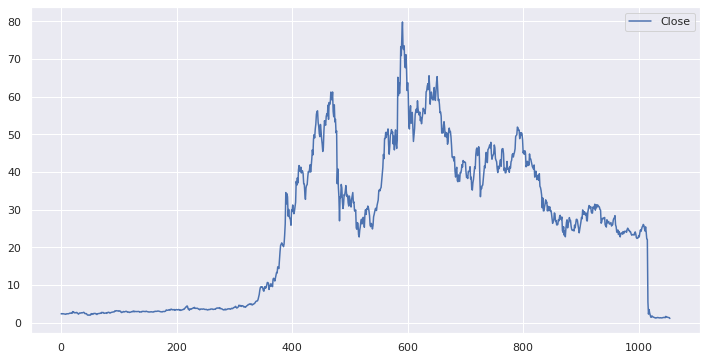

In [6]:
df[['Close']].plot(figsize=(12,6));


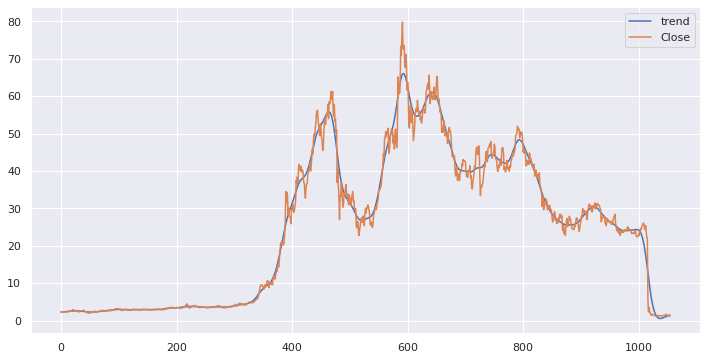

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.517389381251837,
 0.5248921946920638,
 4,
 1050,
 {'1%': -3.4365931987759417,
  '5%': -2.864296541617536,
  '10%': -2.568237690702948},
 4089.512373694983)

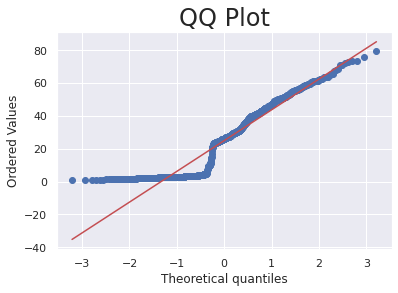

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


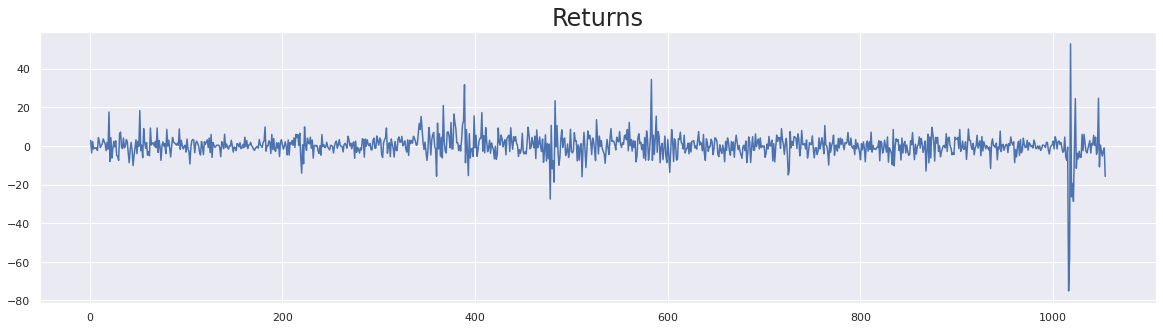

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


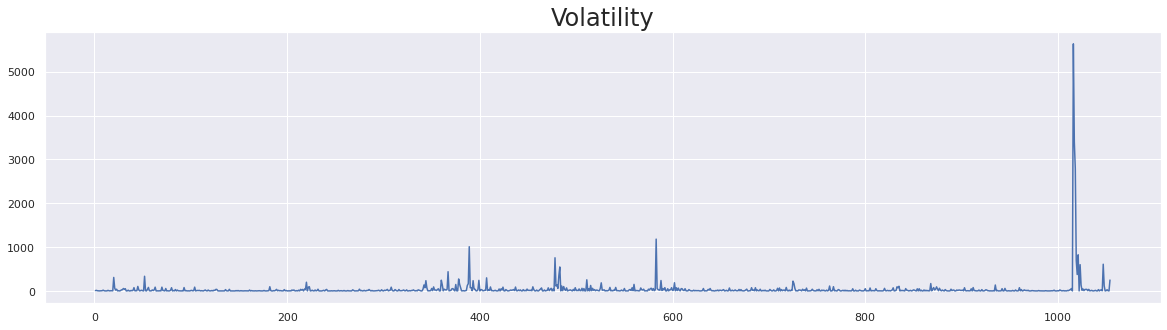

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

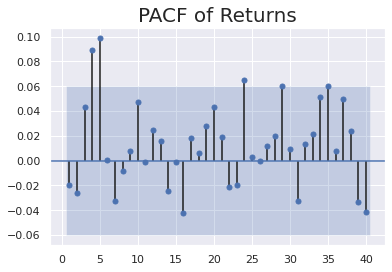

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

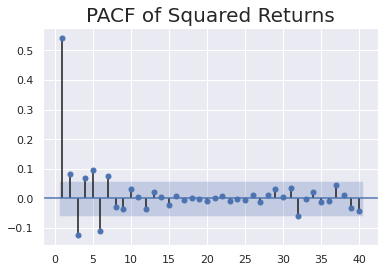

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 13.9 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3683.133680417118
Iteration:      2,   Func. Count:     11,   Neg. LLF: 3442.2589980649177
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3313.8496342698295
Iteration:      4,   Func. Count:     21,   Neg. LLF: 3318.8164392353838
Iteration:      5,   Func. Count:     26,   Neg. LLF: 3300.299122032748
Iteration:      6,   Func. Count:     30,   Neg. LLF: 3300.2513740976697
Iteration:      7,   Func. Count:     34,   Neg. LLF: 3300.2492306093063
Iteration:      8,   Func. Count:     38,   Neg. LLF: 3300.2492170099185
Iteration:      9,   Func. Count:     41,   Neg. LLF: 3300.2492170098367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3300.2492170099185
            Iterations: 9
            Function evaluations: 41
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3300.25
Distribution:                  Normal   AIC:                           6606.50
Method:            Maximum Likelihood   BIC:                           6621.38
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:18   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2519      0.159      1.583      0.114 [-6.006e-02,  0.564]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         27.0711      6.939      3.902  9.558e-05   [ 13.472, 40.670]
alpha[1]       0.1700  6.586e-02      2.582  9.830e-03 [4.095e-02,  0.299]
==========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 3340.957738090705
Iteration:     10,   Func. Count:     59,   Neg. LLF: 3223.8781386629626
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3223.878138084472
            Iterations: 11
            Function evaluations: 64
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3223.88
Distribution:                  Normal   AIC:                           6455.76
Method:            Maximum Likelihood   BIC:                           6475.60
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.4513      0.205      2.204  2.754e-02 [4.992e-02,  0.853]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         14.7510      2.249      6.560  5.379e-11   [ 10.344, 19.158]
alpha[1]       0.1104  3.950e-02      2.795  5.193e-03 [3.298e-02,  0.188]
alpha[2]       0.6722      0.404      1.666  9.578e-02   [ -0.119,  1.463]
==========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 3212.823618330027
Iteration:     10,   Func. Count:     69,   Neg. LLF: 3211.2920011316405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3211.2907064518413
            Iterations: 14
            Function evaluations: 92
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3211.29
Distribution:                  Normal   AIC:                           6432.58
Method:            Maximum Likelihood   BIC:                           6457.38
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4846      0.181      2.680  7.358e-03 [  0.130,  0.839]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         11.2688      1.930      5.839  5.238e-09    [  7.486, 15.051]
alpha[1]       0.1045  3.829e-02      2.729  6.350e-03  [2.945e-02,  0.180]
alpha[2]       0.5795      0.351      1.652  9.860e-02    [ -0.108,  1.267]
alpha[3]       0.2579      0.171      1.507      0.132 [-7.760e-02,  0.593]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 4405.402663711934
Iteration:     10,   Func. Count:    174,   Neg. LLF: 3944.4402200664144
Iteration:     15,   Func. Count:    261,   Neg. LLF: 3230.892342731137
Iteration:     20,   Func. Count:    342,   Neg. LLF: 3198.512468007807
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3198.512273692692
            Iterations: 23
            Function evaluations: 389
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3198.51
Distribution:                  Normal   AIC:                           6427.02
Method:            Maximum Likelihood   BIC:                           6501.43
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4322      0.415      1.042      0.297 [ -0.380,  1.245]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          8.5422     39.529      0.216      0.829    [-68.933, 86.017]
alpha[1]       0.0845  6.044e-02      1.398      0.162 [-3.394e-02,  0.203]
alpha[2]       0.5372      1.233      0.436      0.663    [ -1.879,  2.953]
alpha[3]       0.1784      0.610      0.292      0.770    [ -1.018,  1.374]
alpha[4]       0.0280      0.352  7.953e-02      0.937    [ -0.663,  0.719]
alpha[5]       0.0130  8.793e-02      0.148      0.882    [ -0.159,  0.185]
alpha[6]   2.3172e-11      0.703  3.294e-11      1.000    [ -1.379,  1.379]
alpha[7]       0.0946      0.125      0.759      0.448    [ -0.150,  0.339]
alpha[8]       0.0409      0.530  7.713e-02      0.939    [ -0.997,  1.079]
alpha[9]       0.0000      0.540      0.000      1.000    [ -1.058,  1.058]
alpha[10]      0.0234      0.277  8.432e-02      0.933    [ -0.520,  0.567]
alpha[11]      0.0000      0.357      0.000      1.000    [ -0.701,  0.701]
alpha[12]  6.0305e-11      0.850  7.098e-11      1.000    [ -1.665,  1.665]
alpha[13]  1.1922e-10      1.770  6.736e-11      1.000    [ -3.469,  3.469]
===========================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 3236.756009288787
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3234.1882485970464
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3234.19
Distribution:                  Normal   AIC:                           6476.38
Method:            Maximum Likelihood   BIC:                           6496.22
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:19   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.5143      0.273      1.883  5.965e-02 [-2.091e-02,  1.049]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.9868      1.162      2.570  1.016e-02    [  0.709,  5.264]
alpha[1]       0.3273      0.209      1.563      0.118 [-8.315e-02,  0.738]
beta[1]        0.6727  6.894e-02      9.758  1.698e-22    [  0.538,  0.808]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 3340.115408650705
Iteration:     10,   Func. Count:     67,   Neg. LLF: 3234.188248550143
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3234.188248550143
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3234.19
Distribution:                  Normal   AIC:                           6478.38
Method:            Maximum Likelihood   BIC:                           6503.18
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:19   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.5143      0.223      2.305  2.115e-02 [7.704e-02,  0.952]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.9868      1.612      1.853  6.393e-02   [ -0.173,  6.147]
alpha[1]       0.3273      0.134      2.451  1.423e-02 [6.562e-02,  0.589]
beta[1]        0.6727      0.647      1.039      0.299   [ -0.596,  1.941]
beta[2]    3.0317e-11      0.618  4.903e-11      1.000   [ -1.212,  1.212]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 3387.247531659336
Iteration:     10,   Func. Count:     80,   Neg. LLF: 3234.2388424031733
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3234.188248612204
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3234.19
Distribution:                  Normal   AIC:                           6480.38
Method:            Maximum Likelihood   BIC:                           6510.14
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.5143      0.314      1.635      0.102 [ -0.102,  1.131]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.9866      3.006      0.994      0.320   [ -2.904,  8.878]
alpha[1]       0.3273      0.116      2.820  4.798e-03 [9.984e-02,  0.555]
beta[1]        0.6727      2.873      0.234      0.815   [ -4.959,  6.304]
beta[2]        0.0000      6.268      0.000      1.000   [-12.286, 12.286]
beta[3]        0.0000      3.472      0.000      1.000   [ -6.804,  6.804]
==========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3235.3811610958933
Iteration:     10,   Func. Count:     70,   Neg. LLF: 3208.7327737675782
Iteration:     15,   Func. Count:    100,   Neg. LLF: 3208.7181288747047
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3208.7181288747047
            Iterations: 15
            Function evaluations: 100
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3208.72
Distribution:                  Normal   AIC:                           6427.44
Method:            Maximum Likelihood   BIC:                           6452.24
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:19   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.4235      0.221      1.917  5.524e-02 [-9.489e-03,  0.856]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          5.4831      5.868      0.934      0.350   [ -6.017, 16.983]
alpha[1]       0.0898  3.291e-02      2.730  6.343e-03 [2.533e-02,  0.154]
alpha[2]       0.4753      0.538      0.883      0.377   [ -0.580,  1.530]
beta[1]        0.4296      0.443      0.970      0.332   [ -0.438,  1.298]
==========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 3228.1155294779874
Iteration:     10,   Func. Count:     82,   Neg. LLF: 3208.8527531620757
Iteration:     15,   Func. Count:    118,   Neg. LLF: 3208.7182957118234
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3208.7181289388695
            Iterations: 18
            Function evaluations: 138
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3208.72
Distribution:                  Normal   AIC:                           6429.44
Method:            Maximum Likelihood   BIC:                           6459.20
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4235      0.144      2.944  3.240e-03 [  0.142,  0.705]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          5.4830      4.948      1.108      0.268   [ -4.216, 15.182]
alpha[1]       0.0898  3.777e-02      2.378  1.740e-02 [1.579e-02,  0.164]
alpha[2]       0.4753      0.369      1.288      0.198   [ -0.248,  1.199]
alpha[3]   7.1164e-12      0.456  1.561e-11      1.000   [ -0.894,  0.894]
beta[1]        0.4296      0.381      1.126      0.260   [ -0.318,  1.177]
==========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 5889.5106063233725
Iteration:     10,   Func. Count:     75,   Neg. LLF: 3208.022146958356
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3208.022146960023
            Iterations: 10
            Function evaluations: 75
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3208.02
Distribution:                  Normal   AIC:                           6426.04
Method:            Maximum Likelihood   BIC:                           6450.85
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:20   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2060      0.141      1.457      0.145 [-7.108e-02,  0.483]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4442      0.133      3.344  8.267e-04   [  0.184,  0.705]
alpha[1]       0.4259      0.126      3.373  7.436e-04   [  0.178,  0.673]
gamma[1]      -0.1529      0.122     -1.254      0.210 [ -0.392,8.611e-02]
beta[1]        0.8794  3.085e-02     28.504 1.036e-178   [  0.819,  0.940]
==========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3212.53
Distribution:                  Normal   AIC:                           6435.06
Method:            Maximum Likelihood   BIC:                           6459.86
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:20   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2810      0.136      2.069  3.853e-02 [1.483e-02,  0.547]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.4192      1.169      2.926  3.433e-03   [  1.129,  5.709]
alpha[1]       0.1401  5.603e-02      2.501  1.237e-02 [3.033e-02,  0.250]
gamma[1]       0.4587      0.386      1.188      0.235   [ -0.298,  1.215]
beta[1]        0.6305  7.500e-02      8.407  4.221e-17   [  0.484,  0.778]
==========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 3213.755175156101
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3202.7358253567954
Iteration:     15,   Func. Count:    102,   Neg. LLF: 3202.7093793560352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3202.709379355494
            Iterations: 15
            Function evaluations: 102
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -3202.71
Distribution:                  Normal   AIC:                           6415.42
Method:            Maximum Likelihood   BIC:                           6440.22
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:20   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1802      0.139      1.294      0.196 [-9.273e-02,  0.453]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.6255      0.215      2.913  3.582e-03   [  0.205,  1.046]
alpha[1]       0.1680  4.745e-02      3.540  3.994e-04 [7.499e-02,  0.261]
gamma[1]       0.2534      0.190      1.336      0.182   [ -0.118,  0.625]
beta[1]        0.6903  6.651e-02     10.378  3.132e-25   [  0.560,  0.821]
==========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 3458.8730974316377
Iteration:     10,   Func. Count:     68,   Neg. LLF: 3227.545764488954
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3227.538342649981
            Iterations: 14
            Function evaluations: 91
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -3227.54
Distribution:                  Normal   AIC:                           6465.08
Method:            Maximum Likelihood   BIC:                           6489.88
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4750      0.155      3.069  2.146e-03 [  0.172,  0.778]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.5329      1.342      2.632  8.485e-03 [  0.902,  6.164]
phi            0.0000      0.807      0.000      1.000 [ -1.581,  1.581]
d              0.7256      0.455      1.596      0.110 [ -0.165,  1.617]
beta           0.5129  8.063e-02      6.361  2.005e-10 [  0.355,  0.671]
========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 3659.771963989906
Iteration:     10,   Func. Count:     57,   Neg. LLF: 3526.729294853506
Iteration:     15,   Func. Count:     82,   Neg. LLF: 3303.0077443923674
Iteration:     20,   Func. Count:    102,   Neg. LLF: 3300.2492981815267
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3300.2492171732674
            Iterations: 23
            Function evaluations: 113
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -3300.25
Distribution:                  Normal   AIC:                           6606.50
Method:            Maximum Likelihood   BIC:                           6621.38
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:21   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2519      0.159      1.583      0.113 [-6.004e-02,  0.564]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         27.0725      6.939      3.901  9.564e-05   [ 13.472, 40.673]
alpha[1]       0.1700  6.586e-02      2.582  9.830e-03 [4.095e-02,  0.299]
==========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1071921222.1870601
Iteration:     10,   Func. Count:     85,   Neg. LLF: 5805.269376076838
Iteration:     15,   Func. Count:    123,   Neg. LLF: 3201.7367327908614
Iteration:     20,   Func. Count:    161,   Neg. LLF: 3201.397456139224
Iteration:     25,   Func. Count:    197,   Neg. LLF: 3201.3699673582273
Iteration:     30,   Func. Count:    255,   Neg. LLF: 3201.3636750594333
Iteration:     35,   Func. Count:    297,   Neg. LLF: 3201.380043154645
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3201.3634931118186
            Iterations: 38
            Function evaluations: 323
            Gradient evaluations: 38


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -3201.36
Distribution:                  Normal   AIC:                           6414.73
Method:            Maximum Likelihood   BIC:                           6444.49
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:25:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1652  1.354e-04   1219.495      0.000 [  0.165,  0.165]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3703      0.171      2.162  3.060e-02  [3.463e-02,  0.706]
alpha[1]       0.2552  5.322e-02      4.794  1.635e-06    [  0.151,  0.359]
gamma[1]       0.4987      0.264      1.886  5.924e-02 [-1.944e-02,  1.017]
beta[1]        0.6958  5.417e-02     12.846  9.087e-38    [  0.590,  0.802]
delta          0.6301      0.318      1.982  4.746e-02  [7.060e-03,  1.253]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=69.23640425477234, pvalue=8.881784197001252e-16)

In [46]:
jarque_bera_test.statistic

69.23640425477234

In [47]:
jarque_bera_test.pvalue

8.881784197001252e-16

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1        2.873355
2       -3.586445
3        2.268067
4       -1.577508
5       -0.847907
          ...    
1050    -2.634633
1051    -5.255643
1052    -2.425669
1053    -1.055165
1054   -15.762692
Name: returns, Length: 1054, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=57508.15430796961, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

57508.15430796961

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

36.19583660610762

coef. asimetria

In [53]:
returns.skew()

-1.7445355359788308

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.384
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -8.569
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -11.922
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.851
P-value                         0.006
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1055 non-null   object 
 1   Open        1055 non-null   float64
 2   High        1055 non-null   float64
 3   Low         1055 non-null   float64
 4   Close       1055 non-null   float64
 5   Adj Close   1055 non-null   float64
 6   Volume      1055 non-null   int64  
 7   trend       1055 non-null   float64
 8   returns     1054 non-null   float64
 9   sq_returns  1054 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 82.5+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/FTT-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,2.287055,2.406852,2.287055,2.375446,2.375446,6384886
1,2020-01-28,2.375804,2.443701,2.340724,2.443701,2.443701,8340562
2,2020-01-29,2.444460,2.451443,2.350743,2.356059,2.356059,10064881
3,2020-01-30,2.355978,2.423010,2.324370,2.409496,2.409496,10180765
4,2020-01-31,2.409752,2.412745,2.324408,2.371486,2.371486,9411944
...,...,...,...,...,...,...,...
1050,2022-12-12,1.521726,1.586100,1.468339,1.483301,1.483301,12102268
1051,2022-12-13,1.484800,1.512427,1.338954,1.405344,1.405344,12070049
1052,2022-12-14,1.405075,1.427099,1.348816,1.371255,1.371255,7615573
1053,2022-12-15,1.374439,1.384283,1.337653,1.356786,1.356786,5384789


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,2.375446,6384886
1,2020-01-28,2.443701,8340562
2,2020-01-29,2.356059,10064881
3,2020-01-30,2.409496,10180765
4,2020-01-31,2.371486,9411944
...,...,...,...
1050,2022-12-12,1.483301,12102268
1051,2022-12-13,1.405344,12070049
1052,2022-12-14,1.371255,7615573
1053,2022-12-15,1.356786,5384789


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,2.375446,6384886,2.443701
1,2020-01-28,2.443701,8340562,2.356059
2,2020-01-29,2.356059,10064881,2.409496
3,2020-01-30,2.409496,10180765,2.371486
4,2020-01-31,2.371486,9411944,2.351378
...,...,...,...,...
1050,2022-12-12,1.483301,12102268,1.405344
1051,2022-12-13,1.405344,12070049,1.371255
1052,2022-12-14,1.371255,7615573,1.356786
1053,2022-12-15,1.356786,5384789,1.142920


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,2.375446,6384886,2.443701
1,2020-01-28,2.443701,8340562,2.356059
2,2020-01-29,2.356059,10064881,2.409496
3,2020-01-30,2.409496,10180765,2.371486
4,2020-01-31,2.371486,9411944,2.351378
...,...,...,...,...
1049,2022-12-11,1.523438,18163156,1.483301
1050,2022-12-12,1.483301,12102268,1.405344
1051,2022-12-13,1.405344,12070049,1.371255
1052,2022-12-14,1.371255,7615573,1.356786


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.01424201, 0.00128321, 0.01652239],
       [0.01511022, 0.00178232, 0.01540917],
       [0.01399541, 0.00222237, 0.01608792],
       ...,
       [0.00190218, 0.00273411, 0.00290029],
       [0.00146857, 0.00159729, 0.0027165 ],
       [0.00128452, 0.00102798, 0.        ]])

In [73]:
price_volume_target_scaled_df.shape

(1054, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((1054, 2), (1054, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((685, 2), (685, 1))

In [78]:
X_test.shape, y_test.shape

((369, 2), (369, 1))

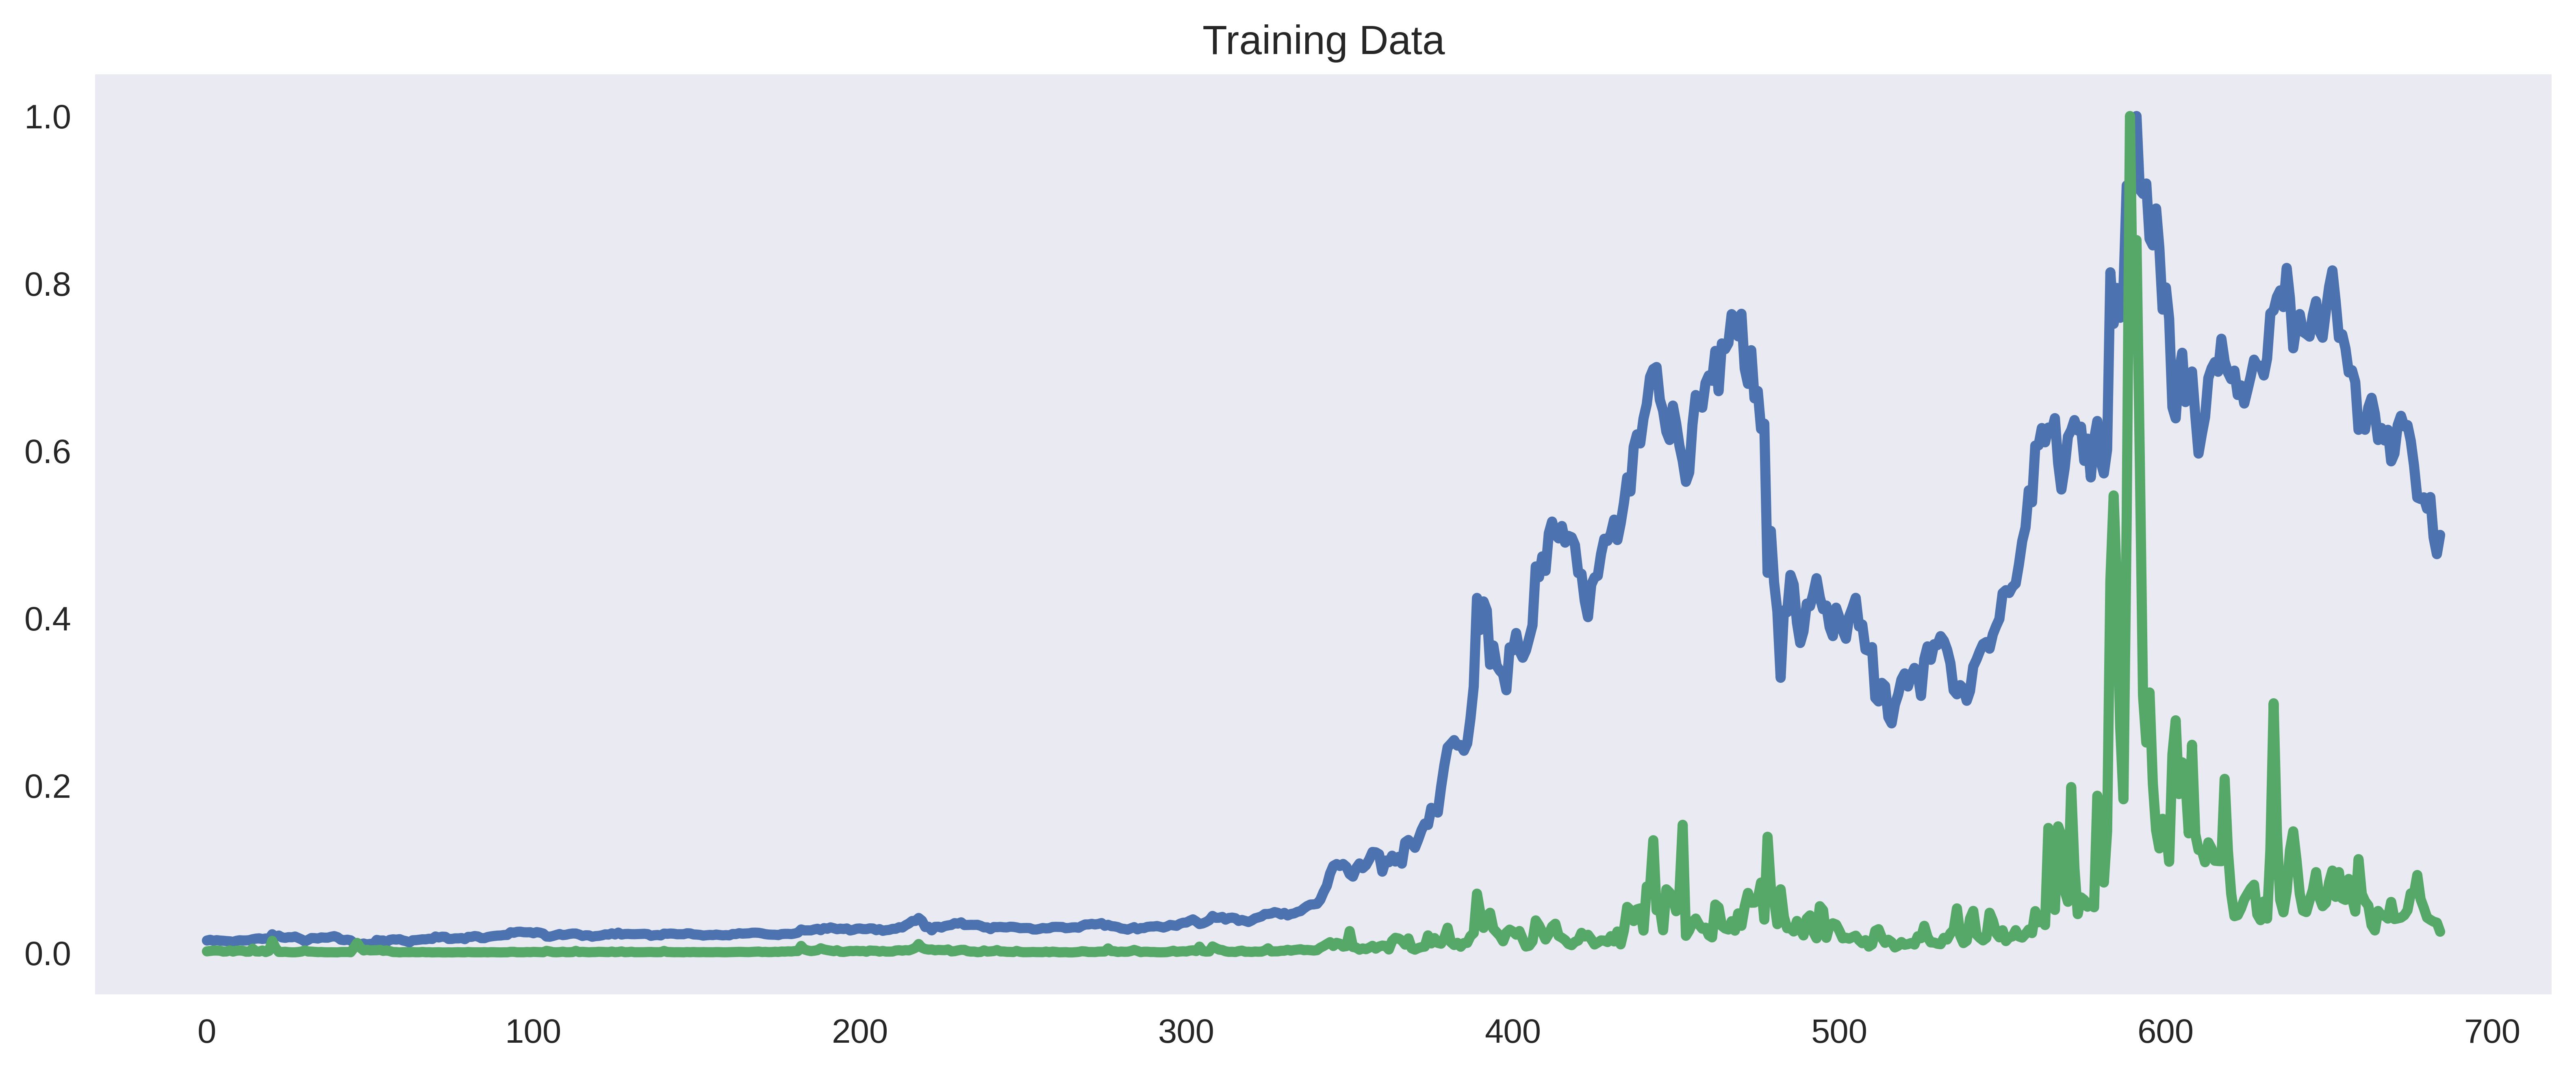

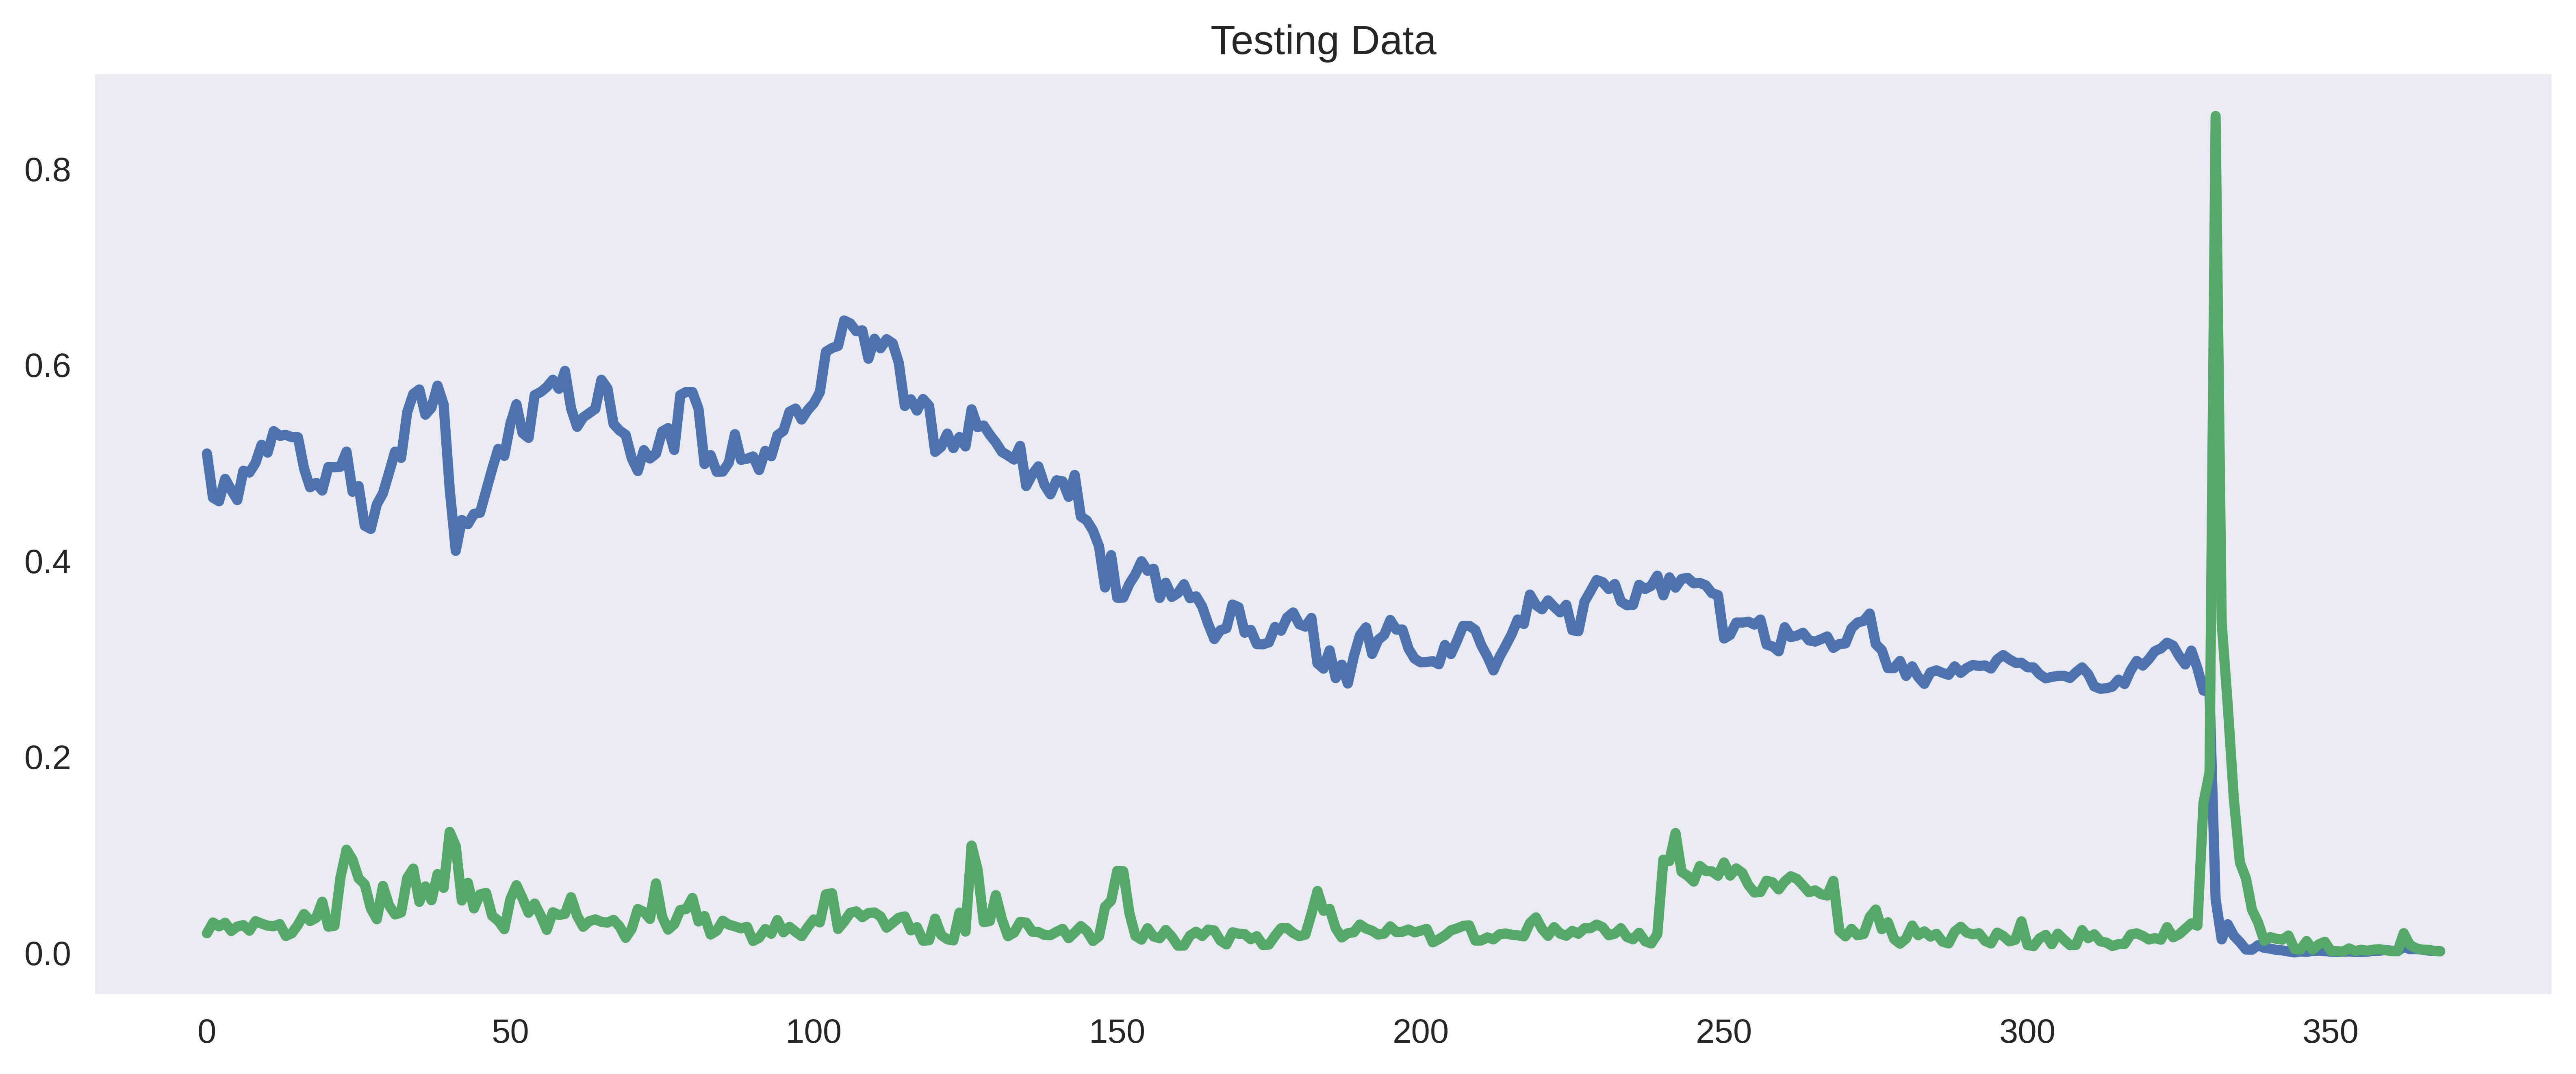

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9827903491595117


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.02228004],
       [0.0231449 ],
       [0.02208546],
       ...,
       [0.01039163],
       [0.00991775],
       [0.00971251]])

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

1054

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
1049,2022-12-11
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.014242
1,2020-01-28,0.015110
2,2020-01-29,0.013995
3,2020-01-30,0.014675
4,2020-01-31,0.014192
...,...,...
1049,2022-12-11,0.003404
1050,2022-12-12,0.002894
1051,2022-12-13,0.001902
1052,2022-12-14,0.001469


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.014242,0.022280
1,2020-01-28,0.015110,0.023145
2,2020-01-29,0.013995,0.022085
3,2020-01-30,0.014675,0.022745
4,2020-01-31,0.014192,0.022268
...,...,...,...
1049,2022-12-11,0.003404,0.011921
1050,2022-12-12,0.002894,0.011353
1051,2022-12-13,0.001902,0.010392
1052,2022-12-14,0.001469,0.009918


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,2.375446,6384886,2.443701
1,2020-01-28,2.443701,8340562,2.356059
2,2020-01-29,2.356059,10064881,2.409496
3,2020-01-30,2.409496,10180765,2.371486
4,2020-01-31,2.371486,9411944,2.351378
...,...,...,...,...
1050,2022-12-12,1.483301,12102268,1.405344
1051,2022-12-13,1.405344,12070049,1.371255
1052,2022-12-14,1.371255,7615573,1.356786
1053,2022-12-15,1.356786,5384789,1.142920


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,2.375446,6384886,2.443701
1,2020-01-28,2.443701,8340562,2.356059
2,2020-01-29,2.356059,10064881,2.409496
3,2020-01-30,2.409496,10180765,2.371486
4,2020-01-31,2.371486,9411944,2.351378
...,...,...,...,...
1050,2022-12-12,1.483301,12102268,1.405344
1051,2022-12-13,1.405344,12070049,1.371255
1052,2022-12-14,1.371255,7615573,1.356786
1053,2022-12-15,1.356786,5384789,1.142920


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.3754460e+00, 6.3848860e+06],
       [2.4437010e+00, 8.3405620e+06],
       [2.3560590e+00, 1.0064881e+07],
       ...,
       [1.3712550e+00, 7.6155730e+06],
       [1.3567860e+00, 5.3847890e+06],
       [1.1429200e+00, 8.1296620e+06]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.01565542]),
 array([0.01652239]),
 array([0.01540917]),
 array([0.01608792]),
 array([0.01560512]),
 array([0.01534971]),
 array([0.0149802]),
 array([0.01471267]),
 array([0.01403877]),
 array([0.01526311]),
 array([0.01595758]),
 array([0.01571455]),
 array([0.01574385]),
 array([0.01606902]),
 array([0.01718814]),
 array([0.01791142]),
 array([0.01824972]),
 array([0.01744924]),
 array([0.0180578]),
 array([0.01751181]),
 array([0.02313271]),
 array([0.02011743]),
 array([0.02158407]),
 array([0.01931434]),
 array([0.01885556]),
 array([0.01965671]),
 array([0.01948803]),
 array([0.0203875]),
 array([0.01866435]),
 array([0.0169209]),
 array([0.01457883]),
 array([0.01640522]),
 array([0.0186307]),
 array([0.01848554]),
 array([0.0180269]),
 array([0.01937076]),
 array([0.01906735]),
 array([0.01902127]),
 array([0.02012809]),
 array([0.02091176]),
 array([0.01959395]),
 array([0.01663273]),
 array([0.01607948]),
 array([0.01664257]),
 array([0.01590505]),
 array([0.012815

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((737, 1, 1), (317, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
19/19 [==============================] - 10s 115ms/step - loss: 0.0682 - val_loss: 0.1478
Epoch 2/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0325 - val_loss: 0.0432
Epoch 3/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0058 - val_loss: 0.0083
Epoch 4/20
19/19 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/20
19/19 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/20
19/19 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 8/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 1

In [102]:
# Make prediction
predicted = model.predict(X)

33/33 [==============================] - 2s 5ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.02699638,
 0.027870093,
 0.026748208,
 0.027432242,
 0.026945692,
 0.02668829,
 0.026315909,
 0.026046298,
 0.025367156,
 0.026601017,
 0.027300898,
 0.027055966,
 0.027085498,
 0.027413193,
 0.028541025,
 0.02926993,
 0.029610861,
 0.02880416,
 0.029417457,
 0.028867211,
 0.034531847,
 0.03149311,
 0.03297115,
 0.030683767,
 0.030221418,
 0.0310288,
 0.030858804,
 0.031765275,
 0.030028718,
 0.028271703,
 0.025911413,
 0.027752018,
 0.02999481,
 0.02984852,
 0.029386312,
 0.03074063,
 0.030434866,
 0.030388415,
 0.031503852,
 0.032293618,
 0.030965552,
 0.027981289,
 0.027423743,
 0.027991213,
 0.02724795,
 0.024133965,
 0.022744019,
 0.022561014,
 0.023386512,
 0.02232477,
 0.022934144,
 0.022894926,
 0.027707603,
 0.026927155,
 0.027050536,
 0.02519966,
 0.027774204,
 0.028439328,
 0.028060244,
 0.028610459,
 0.02708977,
 0.026197972,
 0.024692394,
 0.02730326,
 0.027452994,
 0.02792658,
 0.02843605,
 0.028390521,
 0.029125586,
 0.028822724,
 0.031818107,
 0.030646438,
 0.0316136

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-01
...,...
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14
1053,2022-12-15


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.026996
2,2020-01-29,0.027870
3,2020-01-30,0.026748
4,2020-01-31,0.027432
5,2020-02-01,0.026946
...,...,...
1050,2022-12-12,0.016090
1051,2022-12-13,0.015576
1052,2022-12-14,0.014579
1053,2022-12-15,0.014142


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.026996,0.016522
2,2020-01-29,0.027870,0.015409
3,2020-01-30,0.026748,0.016088
4,2020-01-31,0.027432,0.015605
5,2020-02-01,0.026946,0.015350
...,...,...,...
1050,2022-12-12,0.016090,0.004323
1051,2022-12-13,0.015576,0.003333
1052,2022-12-14,0.014579,0.002900
1053,2022-12-15,0.014142,0.002717


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")